In [154]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import preprocessing

In [147]:
# read data from csv file, instantiate scaler
data_frame = pd.read_csv("cleanedtraining.csv")
data_frame2 = pd.read_csv("fraudTrain.csv")

In [158]:
# fancy math to make the distance column in the data frame
lat = data_frame2['lat']
lon = data_frame2['long']
lat2 = np.array(lat)
lon2 = np.array(lon)

lat1 = np.array(data_frame.merch_lat)
lon1 = np.array(data_frame.merch_long)
R = 6371
x = (np.radians(lon2) - np.radians(lon1)) * np.cos(0.5 * (np.radians(lat2) + np.radians(lat1)))
y = np.radians(lat2) - np.radians(lat1)
d = R * np.sqrt(x*x + y*y)
data_frame['distance'] = d
le = preprocessing.LabelEncoder()
categories = le.fit_transform(data_frame['category'])
data_frame['category' = categories

[8 4 0 ... 1 1 1]


In [149]:
# this is used for the contamination variable. Feel free to experiment with different values. 
percent_fraud = len(data_frame[data_frame['is_fraud'] == 1]) / len(data_frame)

In [152]:
# Taking into account just amt and distance
data = np.array(data_frame[['amt', 'category']])

clf = LocalOutlierFactor(n_neighbors = 20, contamination = percent_fraud) # runs model 
y_pred = clf.fit_predict(data) 

# sci learn returns -1 for outlier and 1 for inlier. Change this to 0 and 1 

y_pred[y_pred == 1] = 0 
y_pred[y_pred == -1] = 1

# get number of wrong predictions
n_errors = (y_pred != data_frame['is_fraud']).sum()
print(n_errors)


ValueError: could not convert string to float: 'misc_net'

In [135]:
# get ground truth from is_fraud column in data frame and output metrics
truth = np.array(data_frame['is_fraud'])
print('{}: Number of errors {}'.format("LOF", n_errors))
print("accuracy score: ", accuracy_score(truth, y_pred))
print(classification_report(truth,y_pred))

        

LOF: Number of errors 14562
accuracy score:  0.9887697379836891
              precision    recall  f1-score   support

           0       0.99      0.99      0.99   1289169
           1       0.03      0.03      0.03      7506

    accuracy                           0.99   1296675
   macro avg       0.51      0.51      0.51   1296675
weighted avg       0.99      0.99      0.99   1296675



Text(0, 0.5, 'Distance b/t transaction and home (km)')

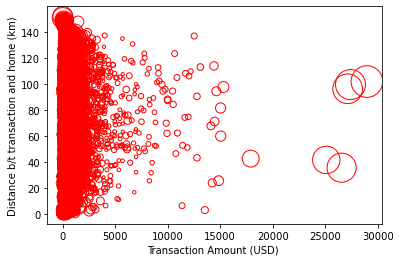

In [139]:
# This cell plots how much of an outlier each point was based on radius. Kinda uninteresting but including it since it was in the example.
# Also hard to tell what's going on in small transafction levels

X_scores = clf.negative_outlier_factor_
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(
    data[:, 0],
    data[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.xlabel("Transaction Amount (USD) ")
plt.ylabel("Distance b/t transaction and home (km)")


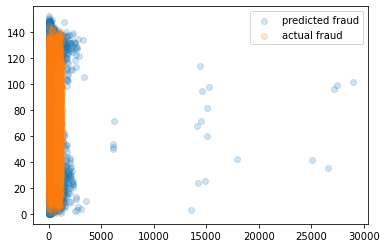

In [137]:
# This is a zoomed out view of actual fraud vs predicted fraud. We zoom in on the 0-1400 x-axis range in the next frame. 
# Terrible plot but included to show that all fraud points are in that x-axis range and by zooming in we don't miss any
pred = data_frame.loc[y_pred == 1]
pred = pred.loc[pred['is_fraud'] == 0]
true = data_frame.loc[data_frame['is_fraud'] == 1]
plt.scatter(pred['amt'], pred['distance'], label = "predicted fraud", alpha = .2)
plt.scatter(true['amt'], true['distance'], label="actual fraud", alpha = .2)
plt.legend()
plt.xlabel("Transaction Amount (USD) ")
plt.ylabel("Distance b/t transaction and home (km)")
plt.show()

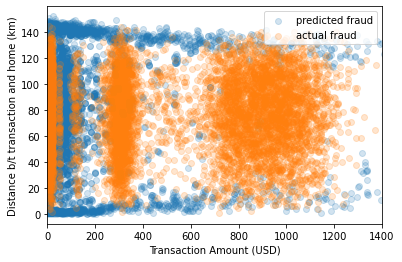

In [140]:
# Zoomed in version of the same plot. 
plt.scatter(pred['amt'], pred['distance'], label = "predicted fraud", alpha = .2)
plt.scatter(true['amt'], true['distance'], label="actual fraud", alpha = .2)
plt.xlim([0, 1400])
plt.xlabel("Transaction Amount (USD)")
plt.ylabel("Distance b/t transaction and home (km)")
plt.legend()
plt.show()

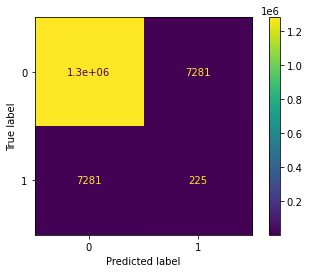

In [145]:
# Probably the best visualization on how the model did
# Correct guesses a ton of not fraud as not fraud, but only 
# recognizes 225 of the 7506 fraud instances

matrix = confusion_matrix(truth, y_pred)
disp = ConfusionMatrixDisplay(matrix)
disp.plot()
plt.show()